# Lab 02. Feature selection and GridSearch


In this lab we will tackle two types of tasks: feature selection and hyperparameter tuning.

Lectures and seminars you might find useful:
- Lectures 1 - 4
- Seminars 2 and 3


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit
- Name your file according to this convention: `2022_lab02_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab02_404_Sheipak_Sviat.ipynb`
    - `2022_lab02_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab02_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 2022-10-20 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/vHEio0TmfAMmZg

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1. Feature Selection [4 points]

In this part of the assignemt you will be offered a task to analyze a dataset and figure out which features are the most important. The first means to solve this problem is to use linear model and examine the weights, another option is to train a logic classifier and see which featires it uses to build the splits. And finally you may use PCA and analyze how new PCA-features are configured.

Firstly, load the data from `feature_selection_sample.txt` and save it into variable `db`.

In [322]:
input_filename = 'data/feature_selection_sample.txt'
db = pd.read_csv(input_filename, sep='\t', header=None)

Feature columns are `[0-9]` and the target is `[10]`. Split the table into object and target arrays:

In [323]:
db

,0,1,2,3,4,5,6,7,8,9,10
0,1.550508,19.483747,-0.002987,4.421460,5.541652,0.468138,-0.017365,0.005496,0.931543,-0.033190,15
1,9.683788,14.336396,-0.027154,5.100489,8.179487,0.573692,-0.024525,0.002686,0.880111,-0.040193,17
2,4.682631,8.112067,-0.012813,4.680838,1.514920,0.974407,-0.009002,0.007909,0.050082,-0.053341,12
3,7.768197,2.074808,-0.014950,7.977821,13.602144,0.599069,-0.018800,0.012021,0.632768,-0.035886,16
4,4.078857,8.307135,-0.004062,9.351602,6.661857,0.193607,-0.019705,0.007799,0.868582,-0.028378,20
...,...,...,...,...,...,...,...,...,...,...,...
995,1.628431,8.719807,-0.005997,6.655049,13.718759,0.630336,-0.011546,0.005294,0.328757,-0.069617,16
996,9.071794,14.742854,-0.033237,7.995329,3.219032,0.800022,-0.015135,0.006431,0.462960,-0.019364,20
997,5.058303,3.274936,-0.005873,6.672859,8.600655,0.585563,-0.028025,0.004060,0.854859,-0.042531,15
998,2.963628,14.404009,-0.017381,7.552177,9.202069,0.940339,-0.009882,0.009923,0.018250,-0.033224,17


In [324]:
X = db.iloc[:, 0:10].values
Y = db[10].values

Now split the data into train and test

In [325]:
from sklearn.model_selection import train_test_split

In [326]:
RANDOM_SEED = 42

In [327]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

**Task 1.1 [1 point] Linear models**

Import `LinearRegression` and define a problem with default parameters.

In [328]:
from sklearn.linear_model import LinearRegression

In [329]:
model_lr = LinearRegression()

Train the model and check the quality both on train set and test set. Since we are solving a regression problem, we will use `mean_squared_error` as a quality metric.

In [330]:
from sklearn.metrics import mean_squared_error

In [331]:
model_lr.fit(X_train, Y_train)
train_pred = model_lr.predict(X_train)
test_pred = model_lr.predict(X_test)
train_score = mean_squared_error(train_pred, Y_train)
test_score = mean_squared_error(test_pred, Y_test)

print("Linear Regression scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))
original_test_score = test_score 

Linear Regression scores: train: 5.814, test: 6.916


Extract feature-vector from the trained model (see [this page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)) and bar-plot them.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


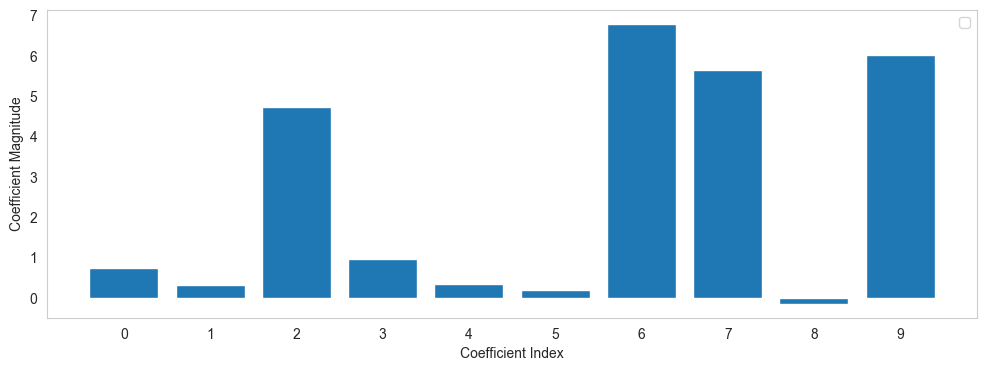

In [332]:
model_coefs = model_lr.coef_

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(x=default_x, height=model_coefs)
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

According to this plot, what are the most important features?

**Your answer here**: 2, 6, 7, 9

Save 4 most important feature indexes to a list:

In [333]:
important_feature_idx = [2, 6, 7, 9]

Use these feature indexes to construct new train and test sets with smaller amount of features:

In [334]:
X_train_smaller = X_train[:, important_feature_idx]
X_test_smaller = X_test[:, important_feature_idx]

Define a new `LinearRegression` model, train and test it on new sets: 

In [335]:
smaller_model = LinearRegression()
smaller_model.fit(X_train_smaller, Y_train)
train_pred = smaller_model.predict(X_train_smaller)
test_pred = smaller_model.predict(X_test_smaller)
train_score = mean_squared_error(train_pred, Y_train)
test_score = mean_squared_error(test_pred, Y_test)
print("{} train score: {:.3f}, test score: {:3.3f}".format('Smaller LR', train_score, test_score))

Smaller LR train score: 22.244, test score: 26.171


Compare scores of `model_lr` (variable `original_score`) and `smaller_model` (variable `smaller_test_score`). We reduced number of feature but why scores changes so drastically?

**Your answer here**: Data is not scaled

**Task 1.2 [1 point] Linear models on scaled data**

It is time to fix this failure and scale the data - we should have done it earlier, since we decided to use linear models. Import the scaler and apply it to all of the data (`X`)

In [336]:
from sklearn.preprocessing import StandardScaler

In [337]:
st_scaler = StandardScaler()
X_scaled = st_scaler.fit_transform(X)

Now we repeat all the steps:
- split the data
- train a model on all features
- plot coefficients
- choose 4 most-important features
- train a model on a feature-subset
- compare the scores
- profit!

In [338]:
X_sc_train, X_sc_test, Y_sc_train, Y_sc_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=RANDOM_SEED)

In [339]:
model_lr_sc = LinearRegression()
model_lr_sc.fit(X_sc_train, Y_sc_train)
train_pred = model_lr_sc.predict(X_sc_train)
test_pred = model_lr_sc.predict(X_sc_test)
train_score = mean_squared_error(train_pred, Y_sc_train)
test_score = mean_squared_error(test_pred, Y_sc_test)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.814, test: 6.916


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


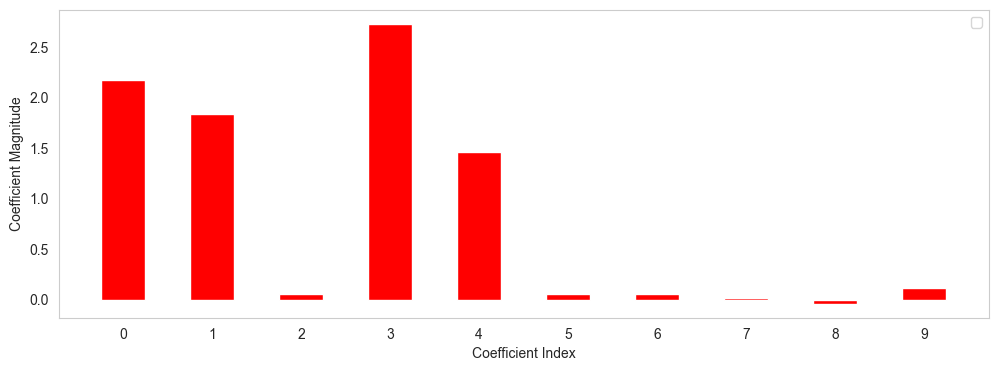

In [340]:
model_coefs = model_lr_sc.coef_

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x, model_coefs, width=0.5, color = 'red')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

What are the most important features now? Let's do the sanity check and train on this subset:

In [341]:
important_feature_idx = [0, 1, 3, 4]

In [342]:
X_sc_train_smaller = X_sc_train[:, important_feature_idx]
X_sc_test_smaller = X_sc_test[:, important_feature_idx]

In [343]:
model_lr_sc_smaller = LinearRegression()
model_lr_sc_smaller.fit(X_sc_train_smaller, Y_sc_train)
train_pred = model_lr_sc_smaller.predict(X_sc_train_smaller)
test_pred = model_lr_sc_smaller.predict(X_sc_test_smaller)
train_score = mean_squared_error(train_pred, Y_sc_train)
test_score = mean_squared_error(test_pred, Y_sc_test)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.841, test: 6.856


Has **MSE** changed? To what extent?

**Your answer here**: Yes, it has changed. train: from 22.244 to 5.841, test: from 26.171 to 6.856

**Task 2 [2 points] Decision Tree**

As you probably now, there are models that are not influence by the fact that data is not normalized: for example, Decision Tree or Random Forest.

Since you already have all the sets prepared: `X_train` and `X_sc_train`, train a RF model and prove that scaling does not affect feature importances.

Then compare durations of training loops for a set with 10 features and 4 features.

In [344]:
from sklearn.ensemble import RandomForestRegressor

In [345]:
rf = RandomForestRegressor()
rf_scaled = RandomForestRegressor()

In [346]:
rf.fit(X_train, Y_train)
rf_scaled.fit(X_sc_train, Y_sc_train)
rf_test_score = mean_squared_error(rf.predict(X_test), Y_test)
rf_scaled_test_score = mean_squared_error(rf_scaled.predict(X_sc_test), Y_sc_test)
print("RF test score {:.3f}".format(rf_test_score))
print("RF scaled test score {:.3f}".format(rf_scaled_test_score))

RF test score 3.031
RF scaled test score 3.075


Look up an attribute for feature importances [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)

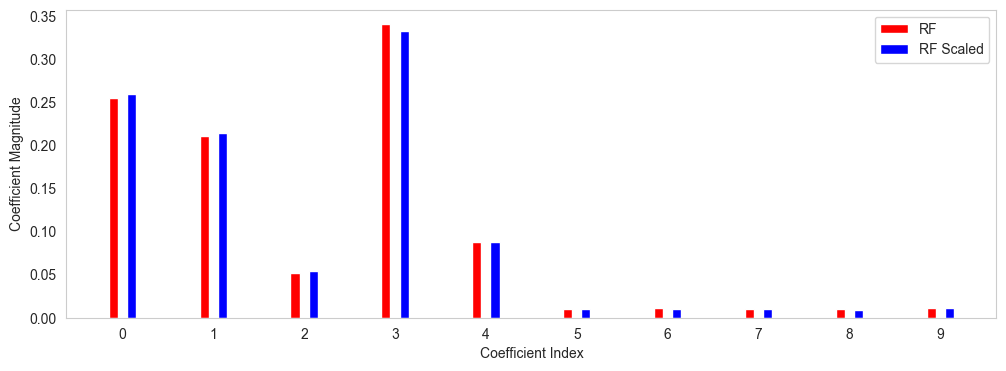

In [347]:
rf_model_coefs = rf.feature_importances_
rf_scaled_model_coefs = rf_scaled.feature_importances_
ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x - 0.1, rf_model_coefs, label="RF", width=0.1, color = 'red')
plt.bar(default_x + 0.1, rf_scaled_model_coefs, label="RF Scaled", width=0.1, color = 'blue')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

**Your Comment on the plot: We can that coefs rf and rf_sc models have a little bit difference. Also models have given the highest weights to the same features as linear regression**

Now examine how reduction of number of features impacts durations of training loops. You may use `time` module.

Here is an example of `time` usage:

In [348]:
from time import time

n = 1000
a = np.diag(np.ones(n)) + np.random.rand(n, n)

start = time()
det = np.linalg.det(a)
end = time()
print("{} x {} matrix determinant took {:.3f} seconds".format(n, n, end - start))

1000 x 1000 matrix determinant took 0.030 seconds


/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [349]:
rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [350]:
t_rf1_start = time()
rf1.fit(X_train, Y_train)
t_rf1_end = time()

t_rf2_start = time()
rf2.fit(X_train_smaller, Y_train)
t_rf2_end = time()
rf1_test_score = mean_squared_error(rf1.predict(X_test), Y_test)
rf2_test_score = mean_squared_error(rf2.predict(X_test_smaller), Y_test)
print("RF test score {:.3f}".format(rf1_test_score))
print("RF smaller test score {:.3f}".format(rf2_test_score))

print("Time for fitting model without reducing features: {:.3f} seconds".format(t_rf1_end - t_rf1_start))
print("Time for fitting model with reducing more than half features: {:.3f} seconds".format(t_rf2_end - t_rf2_start))

RF test score 3.019
RF smaller test score 25.153
Time for fitting model without reducing features: 0.552 seconds
Time for fitting model with reducing more than half features: 0.430 seconds


**Your Comment on time consuption**: In this case we have got faster model fitting, but degraded score

## Part 2. GridSearch: hyperparameter tuning  [11 points]

In this part we will try to solve a multiclass classification task on Richter's dataset ([source](https://www.kaggle.com/mullerismail/richters-predictor-modeling-earthquake-damage)). The aim is to predict damage rate (label from 1 to 3).

We will experiment with following models:
- kNN
- LinearRegression
- DecisionTree
- RandomForest

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the data, transform the table into arrays `X` and `y`, target column is called *damage_grade*. Note that objects are described with both numerical and categorical features. In the first part of this assignment we will use numerical features only (apply `_get_numeric_data()` to `pandas` dataframe).

Split the data into `train`, `test` and `val` with ratio 4-to-2-to-1. Since we are going to use metric classifiers, don't forget to preprocess the data.

In [352]:
RANDOM_SEED = 42

In [353]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [354]:
data = pd.read_csv("./data/richters_sample.csv")
objects = data.drop(columns="damage_grade")
labels = data["damage_grade"]

In [355]:
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,1030261,27,269,8954,4,45,8,10,t,r,...,0,0,0,0,0,0,0,0,0,2
1,419144,11,765,2964,2,65,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
2,543923,22,378,9559,2,30,10,4,t,r,...,0,0,0,0,0,0,0,0,0,2
3,495911,10,310,6799,2,10,5,4,t,w,...,0,0,0,0,0,0,0,0,0,1
4,347963,18,321,2911,1,20,15,2,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,585340,3,720,926,3,25,6,8,t,r,...,0,0,0,0,0,0,0,0,0,3
34996,434042,15,579,5453,2,35,7,5,t,r,...,0,0,0,0,0,0,0,0,0,3
34997,872202,11,660,12077,2,25,8,7,t,r,...,0,0,0,0,0,0,0,0,0,3
34998,456790,2,708,12382,3,20,8,9,t,r,...,0,0,0,0,0,0,0,0,0,2


In [356]:
X = data._get_numeric_data().iloc[:, :-1]
y = data.iloc[:, -1]

assert X.shape == (35000, 31) and  y.shape == (35000,)

In [357]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [358]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size=15000,
                                                    shuffle=True, stratify=y,
                                                    random_state=RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size=5000,
                                                    shuffle=True, stratify=y_not_train,
                                                    random_state=RANDOM_SEED)

assert X_train.shape[0] == 20000 and X_test.shape[0] == 10000 and X_val.shape[0] == 5000

Import the models:

In [359]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Import classification quality metrics:

In [360]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Task 2.1 [2 points]. Default-parameter models**

Let's take 4 classifiers (1 of a kind) with **default** parameters and check how well they can perform.

In [361]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

default_classifiers = [clf1, clf2, clf3, clf4]

Fit each classifier on `X_train, y_train`, predict on `X_test`

In [362]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    clf_predictions.append(pred)

Apply 5 metrics to each prediction:

In [363]:
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions]
macro_precisions = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions]
macro_recalls = [recall_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions]

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

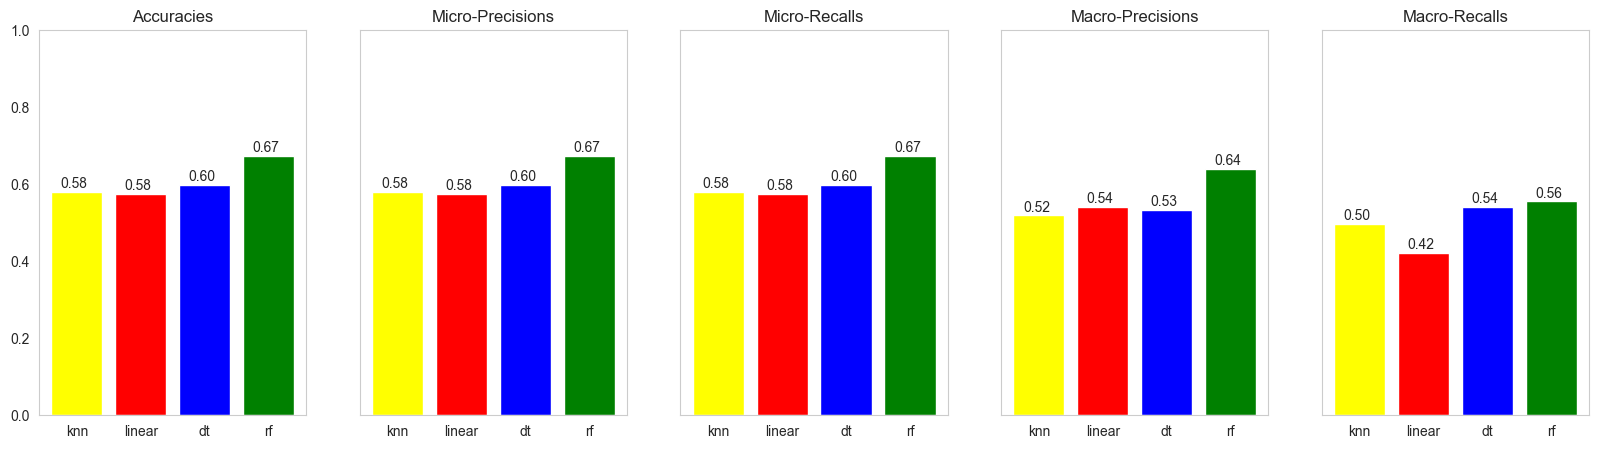

In [364]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

Choose the model with the biggest gap between micro-precision and macro-precision and plot its confusion matrix.
For confusion matrix do `from sklearn.metrics import confusion_matrix` (don't forget to put valid labels on plots).

In [365]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [366]:
weakest_model_index = 2

dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(y_true=y_test, y_pred=clf_predictions[weakest_model_index])

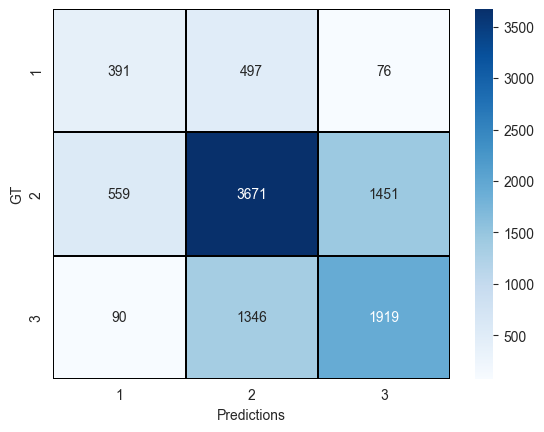

In [367]:
plot_labels = sorted(labels.unique())
sns.heatmap(conf_matrix,
            cmap="Blues",
            xticklabels=plot_labels,
            yticklabels=plot_labels,
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')

plt.ylabel("GT")
plt.xlabel("Predictions")
plt.show()

Going by confusion matrix, which class is the hardest to predict? How does it affect macro/micro-precision?

**Your answer:** 1. Since the number of truly positive predicted labels for class 1 is the smallest among the rest positively predicted, then in micro averaging the number 391 will be lost among 3671 and 1919, which may show that the model works well. At the same time, in macro-averaging, the predictions of each class are taken into account equally, and in this case, due to problems with predictions of the first class, precision is lower than in micro-averaging.

**Task 2.2 [3 points]. 1-D Grid Search**

No wonder that default models have scores far from perfect. Let's tweak those hyperparameters with GridSearch: we will iteratively look through all combinations of parameters in the grid and choose the best. At each iteraction use cross validation score with number of folds `k=5`.

Firstly, build the grid for kNN. It will be a 1-D grid with the only parameter `n_neighbors`. Look through all values from 1 to 50.

*Hint*: `np.arange`, `np.linspace` and `np.logspace` are very useful for grid constructions.

**Attention** this part of assignment may need a lot of computational powers (as you probably remember, training of knn is quite expensive). 

To save some resources while doing grid search for knn you may use the trick from Part1: do feature-selection with DTree/RandomForest and select top-5 or top-10 features.

In [368]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [369]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1, 51)
}

In [370]:
knn_grid_searcher = GridSearchCV(knn_clf, knn_grid, cv=5, return_train_score=True)
knn_grid_searcher.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

Plot mean cross-validation score for each hyperparameter:
- X-axis is hyperparameter values
- Y-axis is mean CV-score

To show variance of obtained estimatets add *mean + 3 stds* and *mean - 3 stds* to the plot. You may use `plt.fill_between` to make it more descriptive (it will look like a coridor around the mean).

To get values we need to plot search in `knn_grid_searcher` parameters and attributes.

In [ ]:
knn_grid_searcher

In [372]:
means = knn_grid_searcher.cv_results_['mean_test_score']
stds = knn_grid_searcher.cv_results_['std_test_score']

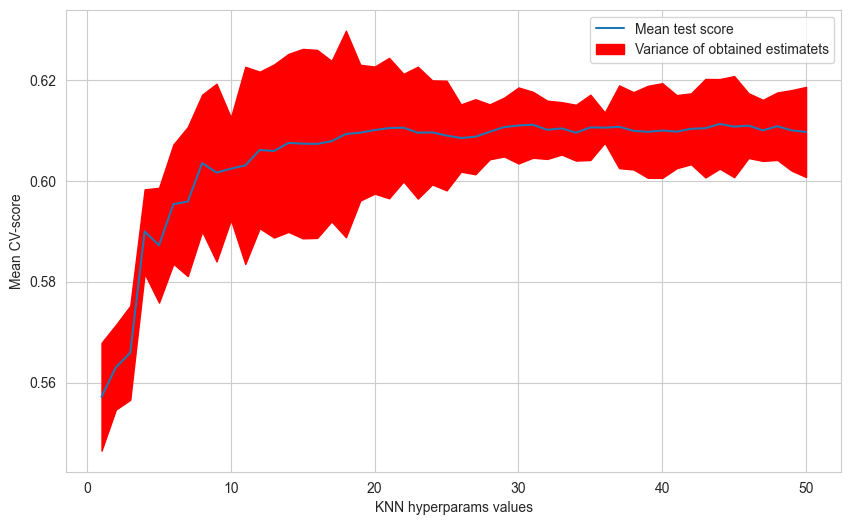

In [373]:
plt.figure(figsize=(10, 6))
xs = knn_grid_searcher.param_grid["n_neighbors"]
plt.plot(xs, means)
plt.fill_between(xs, means-3*stds, means+3*stds, hatch=None, color='red')
plt.xlabel('KNN hyperparams values')
plt.ylabel('Mean CV-score')
plt.legend(['Mean test score', 'Variance of obtained estimatets'])
plt.show()

Print the best estimator and its score:

In [374]:
print(f'The best estimator is {knn_grid_searcher.best_params_["n_neighbors"]} with score: {round(knn_grid_searcher.best_score_, 4)}')

The best estimator is 44 with score: 0.6113


Now do the same for 3 other models:
- Decision Tree: grid search the `max_depth` parameter
- LogisticRegression: `penalty`
- RandomForest: `n_estimators`

Some of the hyperparameters are not numeric, but categorical (like `penalty`) and you should choose some other way to plot cv-scores instead of `plt.plot`

In [375]:
clfs = {'DecisionTree': DecisionTreeClassifier(),
        'LogisticRegression': LogisticRegression(solver='saga', l1_ratio=0.5),
        'RandomForest': RandomForestClassifier()}

clfs_grid = {'DecisionTree': {'max_depth': np.arange(2, 11)},
             'LogisticRegression': {'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             'RandomForest': {'n_estimators': np.arange(2, 50)}}

In [376]:
clfs_grid_searcher = {'DecisionTree': GridSearchCV(clfs['DecisionTree'], clfs_grid['DecisionTree'], cv=5, return_train_score=True).fit(X, y),
                      'LogisticRegression': GridSearchCV(clfs['LogisticRegression'], clfs_grid['LogisticRegression'], cv=5, return_train_score=True).fit(X, y),
                      'RandomForest': GridSearchCV(clfs['RandomForest'], clfs_grid['RandomForest'], cv=5, return_train_score=True).fit(X, y)}

/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:110

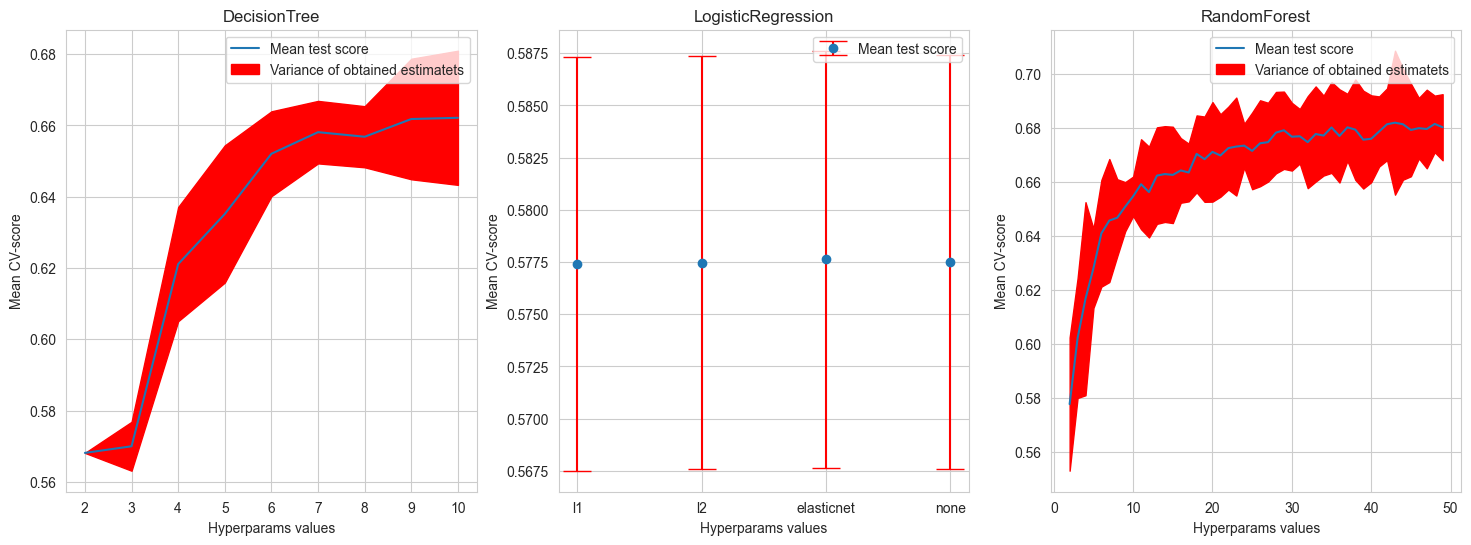

In [377]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for name, clf_grid_searcher, ax in zip(clfs_grid_searcher.keys(), clfs_grid_searcher.values(), axes):
    xs = list(clf_grid_searcher.param_grid.values())[0]
    means = clf_grid_searcher.cv_results_['mean_test_score']
    stds = clf_grid_searcher.cv_results_['std_test_score']
    if name == 'LogisticRegression':
        ax.errorbar(xs, means, yerr = 3*stds, fmt = 'o', capsize = 10, ecolor='r', label = 'mean test score')
    else:
        ax.plot(xs, means)
        ax.fill_between(xs, means - 3 * stds, means + 3 * stds, hatch=None, color='red')
    ax.set_title(name)
    ax.set_xlabel(f"Hyperparams values")
    ax.set_ylabel('Mean CV-score')
    ax.legend(['Mean test score', 'Variance of obtained estimatets'])

In [378]:
print(f'Decision Tree:\n The best estimator is {clfs_grid_searcher["DecisionTree"].best_params_} with score: {round(clfs_grid_searcher["DecisionTree"].best_score_, 4)}')
print(f'Logistic Regression:\n The best estimator is {clfs_grid_searcher["LogisticRegression"].best_params_} with score: {round(clfs_grid_searcher["LogisticRegression"].best_score_, 4)}')
print(f'Random forest:\n The best estimator is {clfs_grid_searcher["RandomForest"].best_params_} with score: {round(clfs_grid_searcher["RandomForest"].best_score_, 4)}')

Decision Tree:
 The best estimator is {'max_depth': 10} with score: 0.6621
Logistic Regression:
 The best estimator is {'penalty': 'elasticnet'} with score: 0.5776
Random forest:
 The best estimator is {'n_estimators': 43} with score: 0.682


**Task 2.3 [3 points] 2-D Grid Search**

Now it's time to improve the models with a 2-D grid search. For each classifier we will look for an optimal **pair** of hyperparameters. However, going through the whole grid may be computationally expensive, so here are some ways to speed it up:

1. Make sparse grids with fewer number of parameters
2. Choose random subsample from grid points and look for the optimum there
3. Reduce number of folds in cross-validation
4. Make a greedy grid search (use two grid-searchers sequentially)

You have 4 models, 4 methods how to make grid search faster, choose one method per model and try it out.
Report whether you got boost in quality.

Here are default 2-D grids:
- kNN:
    - n_neighbors from 1 to 50
    - metric: `euclidean`, `manhattan` or `chebyshev`
    
- linear
    - penalty `l1`, `l2`, `elasticnet`, `none`
    - C from 0.001 to 1000
    
- dtree:
    - max_depth from 1 to 50
    - criterion `gini` or `entropy`

- rf
    - n_estimators from 1 to 200
    - max_features from 1 to 30

**Sparse grid**

In [379]:
knn_param_grid = {
    'n_neighbors': np.unique(np.array([i for i in map(round, np.logspace(0.2, 1.7, 15))])),
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, knn_param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': array([ 2,  3,  4,  5,  7,  9, 11, 15, 19, 24, 31, 39, 50])},
             return_train_score=True)

In [380]:
knn_gscv.param_grid['n_neighbors']

array([ 2,  3,  4,  5,  7,  9, 11, 15, 19, 24, 31, 39, 50])

In [381]:
xs1 = [list(i.values())[0] for i in knn_gscv.cv_results_['params']]
xs2 = [list(i.values())[1] for i in knn_gscv.cv_results_['params']]

In [382]:
def color_get(x):
    if x == 'gini':
        return 0
    if x == 'entropy':
        return 1
    if x == 'elasticnet':
        return 0
    if x == 'l1':
        return 1
    if x == 'l2':
        return 2
    if x == 'none':
        return 3
    if x[0] == 'e':
        return 0
    if x[0] == 'm':
        return 1
    if x[0] == 'c':
        return 2

In [383]:
colors = list(map(color_get, xs1))

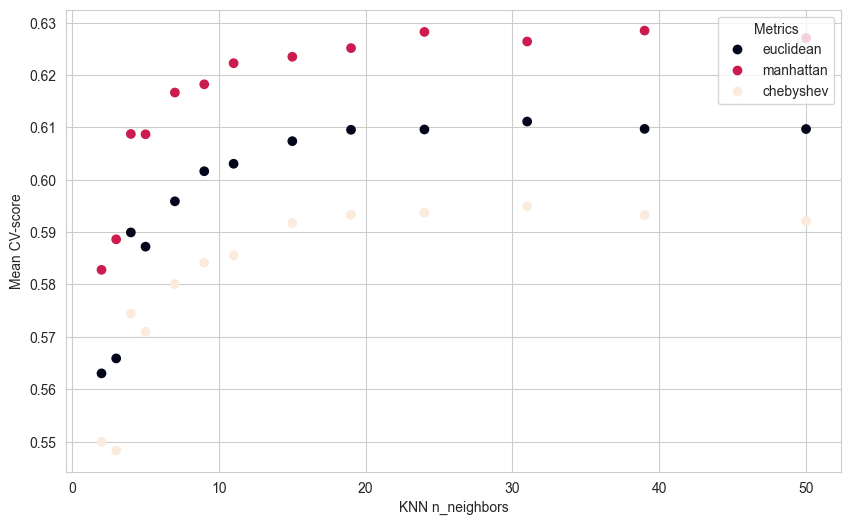

In [384]:
plt.figure(figsize=(10, 6))
means = knn_gscv.cv_results_['mean_test_score']
sc = plt.scatter(xs2, means, c=colors, label = 'mean test score')
plt.xlabel('KNN n_neighbors')
plt.ylabel('Mean CV-score')
handles, labels = sc.legend_elements()
plt.legend(handles=handles, labels=set(xs1), loc="upper right", title="Metrics")

**Choosing random subsample**

In [385]:
np.unique(np.linspace(0.001, 1000, 1000)[list(map(round, np.random.exponential(1, 10000)))])

array([1.000e-03, 1.002e+00, 2.003e+00, 3.004e+00, 4.005e+00, 5.006e+00,
       6.007e+00, 7.008e+00, 8.009e+00])

In [386]:
logreg_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.unique(np.linspace(0.001, 1000, 1000)[list(map(round, np.random.exponential(1, 10000)))]),
}

logreg = LogisticRegression(solver='saga', l1_ratio=0.5)
logreg_gscv = GridSearchCV(logreg, logreg_param_grid, cv=5, return_train_score=True)
logreg_gscv.fit(X, y)

/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/l

GridSearchCV(cv=5, estimator=LogisticRegression(l1_ratio=0.5, solver='saga'),
             param_grid={'C': array([1.0000e-03, 1.0020e+00, 2.0030e+00, 3.0040e+00, 4.0050e+00,
       5.0060e+00, 6.0070e+00, 7.0080e+00, 8.0090e+00, 1.0011e+01,
       1.1012e+01]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             return_train_score=True)

In [387]:
xs1 = [list(i.values())[0] for i in logreg_gscv.cv_results_['params']]
xs2 = [list(i.values())[1] for i in logreg_gscv.cv_results_['params']]

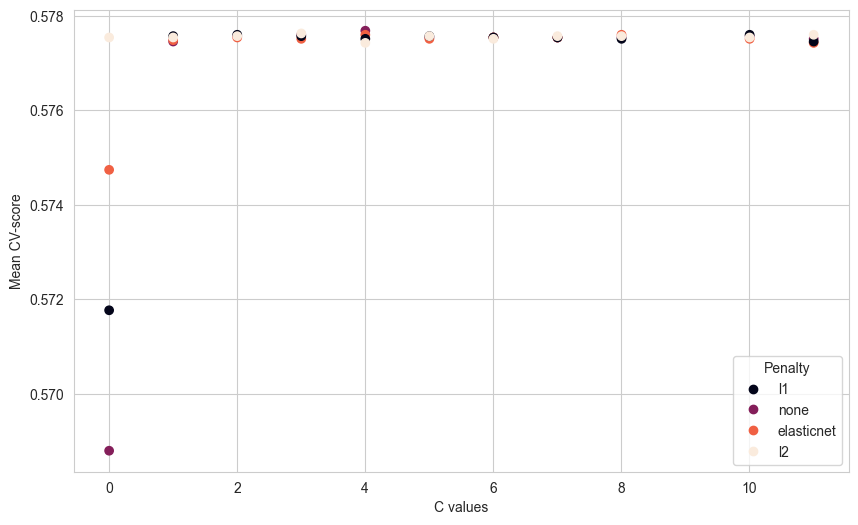

In [388]:
plt.figure(figsize=(10, 6))
means = logreg_gscv.cv_results_['mean_test_score']
sc = plt.scatter(xs1, means, c=list(map(color_get, xs2)), label = 'mean test score')
plt.xlabel('C values')
plt.ylabel('Mean CV-score')
handles, labels = sc.legend_elements()
plt.legend(handles=handles, labels=set(xs2), loc="lower right", title="Penalty")

In [389]:
print(f'The best estimator is {logreg_gscv.best_params_} with score: {round(logreg_gscv.best_score_, 4)}')

The best estimator is {'C': 4.005000000000001, 'penalty': 'l1'} with score: 0.5777


**Reducing number of folds in cross-validation**

In [390]:
dt_param_grid = {
    'max_depth': np.arange(1, 51),
    'criterion': ['gini', 'entropy']
}
cv = 3

dt = DecisionTreeClassifier()
dt_gscv = GridSearchCV(dt, dt_param_grid, cv=cv, return_train_score=True)
dt_gscv.fit(X, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

In [391]:
xs1 = [list(i.values())[0] for i in dt_gscv.cv_results_['params']]
xs2 = [list(i.values())[1] for i in dt_gscv.cv_results_['params']]

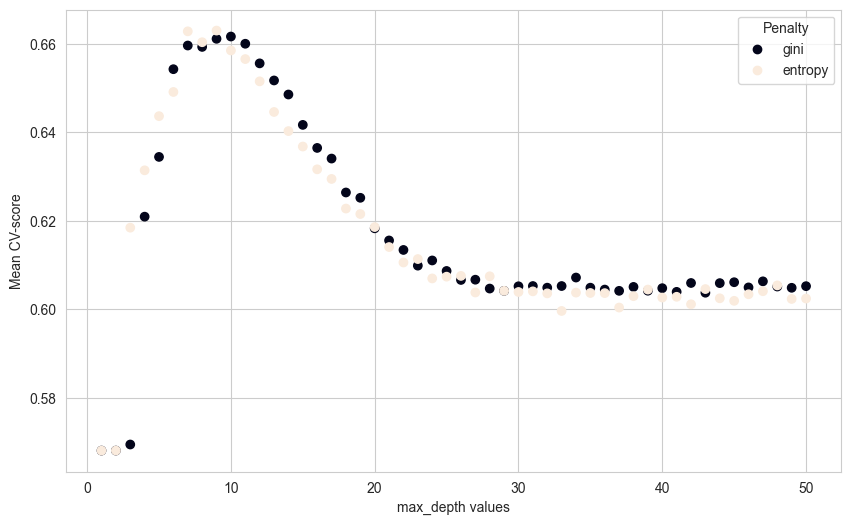

In [392]:
plt.figure(figsize=(10, 6))
means = dt_gscv.cv_results_['mean_test_score']
sc = plt.scatter(xs2, means, c=list(map(color_get, xs1)), label='mean test score')
plt.xlabel('max_depth values')
plt.ylabel('Mean CV-score')
handles, labels = sc.legend_elements()
plt.legend(handles=handles, labels=set(xs1), loc="upper right", title="Penalty")

In [393]:
print(f'The best estimator is {dt_gscv.best_params_} with score: {round(dt_gscv.best_score_, 4)}')

The best estimator is {'criterion': 'entropy', 'max_depth': 9} with score: 0.6629


**Greedy search**

In [394]:
rf_param_grid_1 = {
    'n_estimators': np.arange(1, 201)
}

rf_1 = RandomForestClassifier()
rf_1_gscv = GridSearchCV(rf_1, rf_param_grid_1, cv=5, return_train_score=True)
rf_1_gscv.fit(X, y)
n_estimators = list(rf_1_gscv.best_params_.values())[0]

In [395]:
rf_param_grid_2 = {
    'max_features': np.arange(1, 51)
}

rf_2 = RandomForestClassifier(n_estimators=n_estimators)
rf_2_gscv = GridSearchCV(rf_2, rf_param_grid_2, cv=5, return_train_score=True)
rf_2_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=148),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

In [396]:
n_estimators = list(rf_1_gscv.best_params_.values())[0]

Text(0.5, 1.0, 'GridSearchCV with n_estimators = 148\n for max_features')

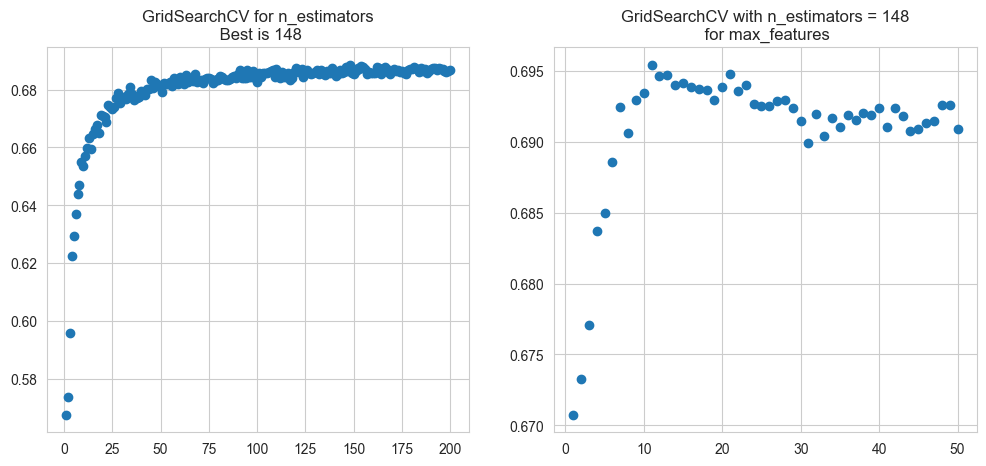

In [397]:
xs1 = rf_1_gscv.param_grid["n_estimators"]
xs2 = rf_2_gscv.param_grid["max_features"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(xs1, rf_1_gscv.cv_results_['mean_test_score'])
ax1.set_title(f'GridSearchCV for n_estimators\n Best is {n_estimators}')
ax2.scatter(xs2, rf_2_gscv.cv_results_['mean_test_score'])
ax2.set_title(f'GridSearchCV with n_estimators = {n_estimators}\n for max_features')

In [398]:
print('________1-D grid search________')
print(f'KNN:\n The best estimator is {knn_grid_searcher.best_params_} with score: {round(knn_grid_searcher.best_score_, 4)}')
print(f'Logistic Regression:\n The best estimator is {clfs_grid_searcher["LogisticRegression"].best_params_} with score: {round(clfs_grid_searcher["LogisticRegression"].best_score_, 4)}')
print(f'Decision Tree:\n The best estimator is {clfs_grid_searcher["DecisionTree"].best_params_} with score: {round(clfs_grid_searcher["DecisionTree"].best_score_, 4)}')
print(f'Random forest:\n The best estimator is {clfs_grid_searcher["RandomForest"].best_params_} with score: {round(clfs_grid_searcher["RandomForest"].best_score_, 4)}')
print('\n________2-D grid search________')
print(f'KNN:\n The best estimator is {knn_gscv.best_params_} with score: {round(knn_gscv.best_score_, 4)}')
print(f'Logistic Regression:\n The best estimator is {logreg_gscv.best_params_} with score: {round(logreg_gscv.best_score_, 4)}')
print(f'Decision Tree:\n The best estimator is {dt_gscv.best_params_} with score: {round(dt_gscv.best_score_, 4)}')
print(f'Random Forest:\n The best estimator is {rf_1_gscv.best_params_|rf_2_gscv.best_params_} with score: {round(rf_2_gscv.best_score_, 4)}')

________1-D grid search________
KNN:
 The best estimator is {'n_neighbors': 44} with score: 0.6113
Logistic Regression:
 The best estimator is {'penalty': 'elasticnet'} with score: 0.5776
Decision Tree:
 The best estimator is {'max_depth': 10} with score: 0.6621
Random forest:
 The best estimator is {'n_estimators': 43} with score: 0.682

________2-D grid search________
KNN:
 The best estimator is {'metric': 'manhattan', 'n_neighbors': 39} with score: 0.6285
Logistic Regression:
 The best estimator is {'C': 4.005000000000001, 'penalty': 'l1'} with score: 0.5777
Decision Tree:
 The best estimator is {'criterion': 'entropy', 'max_depth': 9} with score: 0.6629
Random Forest:
 The best estimator is {'n_estimators': 148, 'max_features': 11} with score: 0.6954


We can see that scores of all models are increased

**Task 2.4 [1 point] Categorical features**

Add categorical features and examine how the influence performance of each model. Preprocess the data before applying a model: we need to encode categorical features with one-hot encoding (`get_dummies` from `pandas` or `OneHotEncoder` from `sklearn`).

Don't forget to repeat the train-test-val splits.

In [399]:
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,1030261,27,269,8954,4,45,8,10,t,r,...,0,0,0,0,0,0,0,0,0,2
1,419144,11,765,2964,2,65,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
2,543923,22,378,9559,2,30,10,4,t,r,...,0,0,0,0,0,0,0,0,0,2
3,495911,10,310,6799,2,10,5,4,t,w,...,0,0,0,0,0,0,0,0,0,1
4,347963,18,321,2911,1,20,15,2,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,585340,3,720,926,3,25,6,8,t,r,...,0,0,0,0,0,0,0,0,0,3
34996,434042,15,579,5453,2,35,7,5,t,r,...,0,0,0,0,0,0,0,0,0,3
34997,872202,11,660,12077,2,25,8,7,t,r,...,0,0,0,0,0,0,0,0,0,3
34998,456790,2,708,12382,3,20,8,9,t,r,...,0,0,0,0,0,0,0,0,0,2


In [400]:
objects_with_dummies = pd.get_dummies(data)
X = objects_with_dummies.drop(columns='damage_grade')
y = objects_with_dummies['damage_grade']

assert X.shape == (35000, 69) and  y.shape == (35000,)

What was your best model before adding categorical features? Random forest

Use GridSearch + 5-fold CV on **train set** to define your new best model.

In [401]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size=15000,
                                                    shuffle=True, stratify=y,
                                                    random_state=RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size=5000,
                                                    shuffle=True, stratify=y_not_train,
                                                    random_state=RANDOM_SEED)

In [402]:
# Sparse grid
knn_cat_gscv = GridSearchCV(knn, knn_param_grid, cv=5, return_train_score=True)
knn_cat_gscv.fit(X_train, y_train)

# Choosing random subsample
logreg_cat_gscv = GridSearchCV(logreg, logreg_param_grid, cv=5, return_train_score=True)
logreg_cat_gscv.fit(X_train, y_train)

# Reducing number of folds in cross-validation
dt_cat_gscv = GridSearchCV(dt, dt_param_grid, cv=3, return_train_score=True)
dt_cat_gscv.fit(X_train, y_train)

# Greedy grid search
rf_cat_1_gscv = GridSearchCV(rf_1, rf_param_grid_1, cv=5, return_train_score=True)
rf_cat_1_gscv.fit(X_train, y_train)

# Do not look at the error. I've solved it in next block

/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/l

ValueError: 
All the 250 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 396, in fit
    self._validate_estimator()
  File "/Users/litvan007/intro_ml_2022/homeworks/hw01/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py", line 136, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be an integer, got <class 'builtin_function_or_method'>.


In [407]:
n_estimators = list(rf_1_gscv.best_params_.values())[0]
rf_2 = RandomForestClassifier(n_estimators=n_estimators)
rf_cat_2_gscv = GridSearchCV(rf_2, rf_param_grid_2, cv=5, return_train_score=True)
rf_cat_2_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=148),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

In [408]:
print(f'Before adding categorial features\n KNN score: {knn_gscv.best_score_}\n Logistic regression score: {logreg_gscv.best_score_}\n Decision Tree score: {dt_gscv.best_score_}\n Random forest score: {rf_2_gscv.best_score_}\n')
print(f'After adding categorial features\n KNN score: {knn_cat_gscv.best_score_}\n Logistic regression score: {logreg_cat_gscv.best_score_}\n Decision Tree score: {dt_cat_gscv.best_score_}\n Random forest score: {rf_cat_2_gscv.best_score_}')

Before adding categorial features
 KNN score: 0.6284857142857143
 Logistic regression score: 0.5776857142857142
 Decision Tree score: 0.6629428990427365
 Random forest score: 0.6954285714285715

After adding categorial features
 KNN score: 0.61015
 Logistic regression score: 0.5917
 Decision Tree score: 0.6549004607975423
 Random forest score: 0.6899000000000001


Performance of which model increased the most? Why?

**Your answer here**: Logistic regression, because score have been increased on 0.01

**Task 2.5 [2 point] Blending**

Since you have already trained and tuned a lot of models, it might be useful to **blend** two best classifiers to get one even better.

Pick two best models, say, `clf_a` and `clf_b`, train them on the `train_set`.

Then use `Voting classifier` to build 
$$
clf_c(\alpha) = \alpha \cdot clf_a + (1 - \alpha) \cdot clf_b
$$
You will have to tune $\alpha$ using grid search on `test_set` and then make final quality assessment on `val_set`.

In [409]:
from sklearn.ensemble import VotingClassifier

In [410]:
criterion = dt_cat_gscv.best_params_['criterion']
max_depth = dt_cat_gscv.best_params_['max_depth']

n_estimators = list(rf_cat_1_gscv.best_params_.values())[0]
max_features = list(rf_cat_2_gscv.best_params_.values())[0]

In [411]:
clf_a = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
clf_b = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features)

In [412]:
eclf = VotingClassifier(estimators=[('dr', clf_a), ('rf', clf_b)])
eclf_params = {
    'weights': [[i, j] for i, j in zip(np.linspace(0, 1, 10), 1-np.linspace(0, 1, 10))]
}
eclf_gscv = GridSearchCV(eclf, eclf_params, cv=5)
eclf_gscv.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('dr',
                                                     DecisionTreeClassifier(criterion='entropy',
                                                                            max_depth=8)),
                                                    ('rf',
                                                     RandomForestClassifier(max_features=45,
                                                                            n_estimators=166))]),
             param_grid={'weights': [[0.0, 1.0],
                                     [0.1111111111111111, 0.8888888888888888],
                                     [0.2222222222222222, 0.7777777777777778],
                                     [0.3333333333333333, 0.6666666666666667],
                                     [0.4444444444444444, 0.5555555555555556],
                                     [0.5555555555555556, 0.4444444444444444],
                                     [0.6666666666666666, 0.33333333333333337],
                                     [0.7777777777777777, 0.22222222222222232],
                                     [0.8888888888888888, 0.11111111111111116],
                                     [1.0, 0.0]]})

In [413]:
eclf = VotingClassifier(estimators=[('dr', clf_a), ('rf', clf_b)], weights=list(eclf_gscv.best_params_.values())[0])
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('dr',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=8)),
                             ('rf',
                              RandomForestClassifier(max_features=45,
                                                     n_estimators=166))],
                 weights=[0.0, 1.0])

In [414]:
print(f'Accuracy score of blending: {eclf.score(X_val, y_val)}')

Accuracy score of blending: 0.6992


What was the best pair of models to blend? Did blending help to increase quality of each classifier? **Your answer here:** Decision tree and random forest. Yes, it did, but not so significant